In [37]:
# pip install yfinance --upgrade --no-cache-dir

In [38]:
# pip install matplotlib

In [ ]:
# pip install patsy statsmodels

In [ ]:
# pip install mpl_finance

In [3]:
# load libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import seaborn as sns
sns.set(style="white", color_codes=True)

In [4]:
# common variables
START_DATE_1 = '2020-01-01'
END_DATE_1 = '2020-09-01'
START_DATE_2 = '2007-12-01'
END_DATE_2 = '2009-07-01'
finance_sector = ['DBS','OCBC','UOB']

# ignore, no time to cover
# tech_sector = ['SEA','ZOOM']
# ticker_list = ['D05.SI','O39.SI','U11.SI','SE','ZM']

# background of stock (only DBS data available from yahoo finance)
- major holder
- revenue

In [5]:
# background of stock
dbs = yf.Ticker(ticker_list[0])
dbs.history(start = START_DATE_1, end = END_DATE_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,24.86,25.02,24.82,25.01,2063600,0.0,0
2020-01-03,25.06,25.21,24.74,24.90,4336600,0.0,0
2020-01-06,24.71,24.83,24.71,24.77,5928500,0.0,0
2020-01-07,25.03,25.08,24.86,24.95,8593000,0.0,0
2020-01-08,24.71,24.75,24.49,24.64,14782300,0.0,0
...,...,...,...,...,...,...,...
2020-08-25,20.78,21.11,20.74,20.99,4256500,0.0,0
2020-08-26,20.88,20.94,20.60,20.68,3316900,0.0,0
2020-08-27,20.60,20.73,20.38,20.46,4387100,0.0,0


In [6]:
ocbc = yf.Ticker(ticker_list[1])
ocbc.history(start = START_DATE_1,end = END_DATE_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,10.43,10.52,10.38,10.49,3831900,0.0,0
2020-01-03,10.54,10.59,10.40,10.48,4381400,0.0,0
2020-01-06,10.41,10.42,10.35,10.39,4399500,0.0,0
2020-01-07,10.44,10.52,10.42,10.46,4941200,0.0,0
2020-01-08,10.31,10.50,10.25,10.47,7779500,0.0,0
...,...,...,...,...,...,...,...
2020-08-25,8.62,8.83,8.62,8.74,5351300,0.0,0
2020-08-26,8.75,8.75,8.63,8.67,3998000,0.0,0
2020-08-27,8.67,8.70,8.60,8.61,5726100,0.0,0


In [7]:
uob = yf.Ticker(ticker_list[2])
uob.history(start = START_DATE_1,end = END_DATE_1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,25.47,25.68,25.35,25.67,1584900,0.00,0
2020-01-03,25.73,25.86,25.43,25.62,1638900,0.00,0
2020-01-06,25.45,25.46,25.30,25.37,2343000,0.00,0
2020-01-07,25.41,25.75,25.41,25.68,2442100,0.00,0
2020-01-08,25.59,25.76,25.20,25.70,3022700,0.00,0
...,...,...,...,...,...,...,...
2020-08-25,19.50,19.80,19.46,19.67,3059300,0.00,0
2020-08-26,19.74,19.74,19.53,19.56,3608500,0.39,0
2020-08-27,19.72,19.73,19.48,19.48,3294700,0.00,0


In [8]:
# yahoo finance a lot of open issues: https://github.com/ranaroussi/yfinance/pull/179
# for dbs, sometimes working, sometimes not!!!

# major holders
major_holder_dbs = dbs.major_holders
print(major_holder_dbs)

# institutional holders
print(dbs.institutional_holders)


        0                                      1
0   0.55%        % of Shares Held by All Insider
1  53.51%       % of Shares Held by Institutions
2  53.81%        % of Float Held by Institutions
3     511  Number of Institutions Holding Shares
                              Holder  Shares Date Reported   % Out     Value
0  Aristotle Capital Management, LLC  761202    2020-06-30  0.0003  15833001


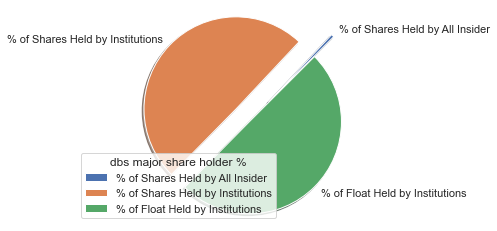

In [9]:
# pie chart of dbc major share holders

#labels
label_dbs = major_holder_dbs.iloc[0:3,1]

#shares
share_dbc = major_holder_dbs.iloc[0:3,0] # string
share_dbc_float = share_dbc.apply(lambda x: float(x.strip('%'))/100) # convert to float

Explode = [0.3,0.2,0]
plt.pie(share_dbc_float,explode=Explode,labels=label_dbs,shadow=True,startangle=45) # To create pie chart.
plt.axis('equal')
plt.legend(title="dbs major share holder %")
plt.show()

In [154]:
# ## Comment-out this cell

# # yahoo finance a lot of open issues: https://github.com/ranaroussi/yfinance/pull/179
# # for ocbc, never working!!! 
# # base.py -> holders = _pd.read_html(url) can be empty

# # major holders 
# major_holder_ocbc = ocbc.major_holders

# print(major_holder_ocbc)

# # institutional holders
# print(ocbc.institutional_holders)

In [ ]:
# ## Comment-out this cell because previous cell not working!

# # pie chart of ocbc major share holders

# #labels
# label_ocbc = major_holder_ocbc.iloc[0:3,1]

# #shares
# share_ocbc = major_holder_ocbc.iloc[0:3,0] # string
# share_ocbc_float = share_ocbc.apply(lambda x: float(x.strip('%'))/100) # convert to float

# # pie chart of ocbc major share holders
# Explode = [0.3,0.2,0]
# plt.pie(share_ocbc_float,explode=Explode,labels=label_ocbc,shadow=True,startangle=45) # To create pie chart.
# plt.axis('equal')
# plt.legend(title="ocbc major share holder %")
# plt.show()

In [150]:
# ## Comment-out this cell

# # yahoo finance a lot of open issues: https://github.com/ranaroussi/yfinance/pull/179
# # for uob, never working!!!
# # base.py -> holders = _pd.read_html(url) can be empty
# # major holders 
# major_holder_uob = uob.major_holders
# print(major_holder_uob)

# # institutional holders
# print(uob.institutional_holders)


In [151]:
# ## Comment-out this cell because previous cell not working!

# pie chart of uob major share holders

# #labels
# label_uob = major_holder_uob.iloc[0:3,1]

# #shares
# share_uob = major_holder_uob.iloc[0:3,0] # string
# share_uob_float = share_uob.apply(lambda x: float(x.strip('%'))/100) # convert to float

# # pie chart of uob major share holders
# Explode = [0.3,0.2,0]
# plt.pie(share_uob_float,explode=Explode,labels=label_uob,shadow=True,startangle=45) # To create pie chart.
# plt.axis('equal')
# plt.legend(title="uob major share holder %")
# plt.show()

In [10]:
# display the revenue among 3 banks (ocbc & uob not working)
print(dbs.calendar)


                                Value
Earnings Date     2020-11-05 00:00:00
Earnings Average                 None
Earnings Low                     None
Earnings High                    None
Revenue Average            3334360000
Revenue Low                3322520000
Revenue High               3342560000


Text(0.5, 1.0, 'dbs revenue summary')

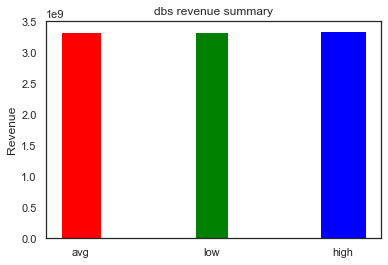

In [11]:
# bar chart
category = ['avg','low','high']
value = dbs.calendar.iloc[4:,0]
label = ['dbs revenue']

width = [0.3, 0.25, 0.35]
c = ['red','green','blue']
plt.bar(category, value, width, color = c)

plt.ylabel('Revenue')
plt.title('dbs revenue summary')


## Case study 1: Impact of Covid-19 on stocks offered by local banks
Download data of local backs' equities during Covid-19 period, namely, OCBC, DBS and UOB. According to statistics, the impact of Covid-19 on Singapore started from Janurary, 2020 and it is still ongoing.

In [12]:
df_ocbc = yf.download(ticker_list[1],
                    start = START_DATE_1,
                    end = END_DATE_1,
                    progress = False)
df_dbs = yf.download(ticker_list[0],
                    start = START_DATE_1,
                    end = END_DATE_1,
                    progress = False)
df_uob = yf.download(ticker_list[2],
                    start = START_DATE_1,
                    end = END_DATE_1,
                    progress = False)

Check the no. of entires, column names, null entries.

In [11]:
df_ocbc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2020-01-02 to 2020-08-31
Data columns (total 6 columns):
Open         165 non-null float64
High         165 non-null float64
Low          165 non-null float64
Close        165 non-null float64
Adj Close    165 non-null float64
Volume       165 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.0 KB


In [12]:
df_dbs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2020-01-02 to 2020-08-31
Data columns (total 6 columns):
Open         165 non-null float64
High         165 non-null float64
Low          165 non-null float64
Close        165 non-null float64
Adj Close    165 non-null float64
Volume       165 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.0 KB


In [13]:
df_uob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2020-01-02 to 2020-08-31
Data columns (total 6 columns):
Open         165 non-null float64
High         165 non-null float64
Low          165 non-null float64
Close        165 non-null float64
Adj Close    165 non-null float64
Volume       165 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.0 KB


Statistics for the first 5 rows and last 5 rows of data points

In [14]:
print('ocbc stock data:')
print(df_ocbc.head())
print(df_ocbc.tail())

ocbc stock data:
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2020-01-02  10.97  11.06  10.91  11.03  10.490239  3831900
2020-01-03  11.08  11.14  10.94  11.02  10.480728  4381400
2020-01-06  10.95  10.96  10.88  10.92  10.385622  4399500
2020-01-07  10.98  11.06  10.96  11.00  10.461707  4941200
2020-01-08  10.84  11.04  10.78  11.01  10.471218  7779500
            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2020-08-25  8.62  8.83  8.62   8.74       8.74  5351300
2020-08-26  8.75  8.75  8.63   8.67       8.67  3998000
2020-08-27  8.67  8.70  8.60   8.61       8.61  5726100
2020-08-28  8.75  8.87  8.67   8.71       8.71  8154700
2020-08-31  8.81  8.81  8.65   8.67       8.67  6199000


In [15]:
print('dbs stock data:')
print(df_dbs.head())
print(df_dbs.tail())

dbs stock data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  25.959999  26.120001  25.920000  26.110001  25.006714   2063600
2020-01-03  26.170000  26.320000  25.830000  26.000000  24.901360   4336600
2020-01-06  25.799999  25.930000  25.799999  25.860001  24.767277   5928500
2020-01-07  26.129999  26.190001  25.959999  26.049999  24.949247   8593000
2020-01-08  25.799999  25.840000  25.570000  25.730000  24.642769  14782300
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-08-25  20.780001  21.110001  20.740000  20.990000  20.990000  4256500
2020-08-26  20.879999  20.940001  20.600000  20.680000  20.680000  3316900
2020-08-27  20.600000  20.730000  20.379999  20.459999  20.459999  4387100
2020-08-28  20.700001  21.070000  20.610001  20.760000  20.760000  5875000
20

In [16]:
print('uob stock data:')
print(df_uob.head())
print(df_uob.tail())

uob stock data:
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  26.480000  26.700001  26.350000  26.680000  25.665627  1584900
2020-01-03  26.750000  26.879999  26.440001  26.629999  25.617527  1638900
2020-01-06  26.459999  26.469999  26.299999  26.370001  25.367414  2343000
2020-01-07  26.410000  26.770000  26.410000  26.700001  25.684868  2442100
2020-01-08  26.600000  26.780001  26.200001  26.719999  25.704103  3022700
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-08-25  19.889999  20.190001  19.850000  20.059999  19.670000  3059300
2020-08-26  19.740000  19.740000  19.530001  19.559999  19.559999  3608500
2020-08-27  19.719999  19.730000  19.480000  19.480000  19.480000  3294700
2020-08-28  19.719999  19.980000  19.600000  19.660000  19.660000  3464700
2020-08-3

# smooth data - decomposition to get trend

Text(1.0, 1.0, 'Decomposition of uob close price')

<Figure size 432x288 with 0 Axes>

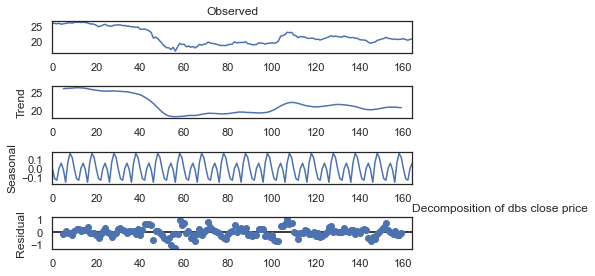

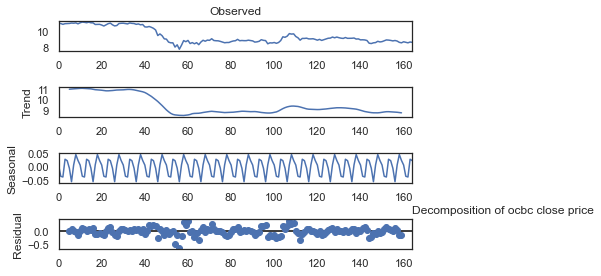

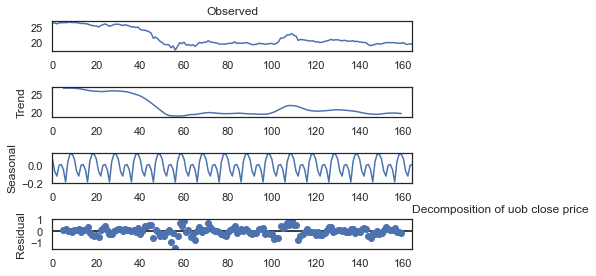

In [13]:
# Smooth technique: decomposition

# demonstrate using column 'Close' first

dbs_close = df_dbs.Close[:]
ocbc_close = df_ocbc.Close[:]
uob_close = df_uob.Close[:]
# dbs_close = df_dbs['Close']

from statsmodels.tsa.seasonal import seasonal_decompose
dbs_close_decomp = seasonal_decompose(dbs_close.values, period=10)
ocbc_close_decomp = seasonal_decompose(ocbc_close.values, period=10)
uob_close_decomp = seasonal_decompose(uob_close.values, period=10)

# plot of decomposition of each close price
plt.figure(1)
dbs_close_decomp.plot()
plt.title('Decomposition of dbs close price',loc='right', horizontalalignment='left', verticalalignment='baseline')

plt.figure(2)
ocbc_close_decomp.plot()
plt.title('Decomposition of ocbc close price',loc='right', horizontalalignment='left', verticalalignment='baseline')

plt.figure(3)
uob_close_decomp.plot()
plt.title('Decomposition of uob close price',loc='right', horizontalalignment='left', verticalalignment='baseline')

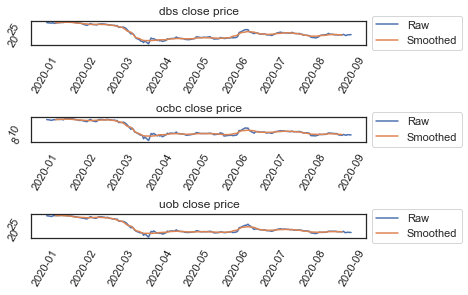

In [14]:
# After decomposition, only interested in "trend"
dbs_close_trend = dbs_close_decomp.trend
ocbc_close_trend = ocbc_close_decomp.trend
uob_close_trend = uob_close_decomp.trend

fig, axs = plt.subplots(3,1)
line_1, = axs[0].plot(df_dbs.index.values, dbs_close, label='line 1')
line_2, = axs[0].plot(df_dbs.index.values, dbs_close_trend, label='line 2')
axs[0].set_title('dbs close price')
axs[0].legend([line_1, line_2], ['Raw', 'Smoothed'], loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[0].tick_params(labelrotation=60)

line_3, = axs[1].plot(df_ocbc.index.values, ocbc_close, label='line 3')
line_4, = axs[1].plot(df_ocbc.index.values, ocbc_close_trend, label='line 4')
axs[1].set_title('ocbc close price')
axs[1].legend([line_3, line_4], ['Raw', 'Smoothed'], loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[1].tick_params(labelrotation=60)

line_5, = axs[2].plot(df_uob.index.values, uob_close, label='line 5')
line_6, = axs[2].plot(df_uob.index.values, uob_close_trend, label='line 6')
axs[2].set_title('uob close price')
axs[2].legend([line_5, line_6], ['Raw', 'Smoothed'], loc='center left', bbox_to_anchor=(1.0, 0.5))
axs[2].tick_params(labelrotation=60)

fig.subplots_adjust(wspace=.5, hspace=3.0)


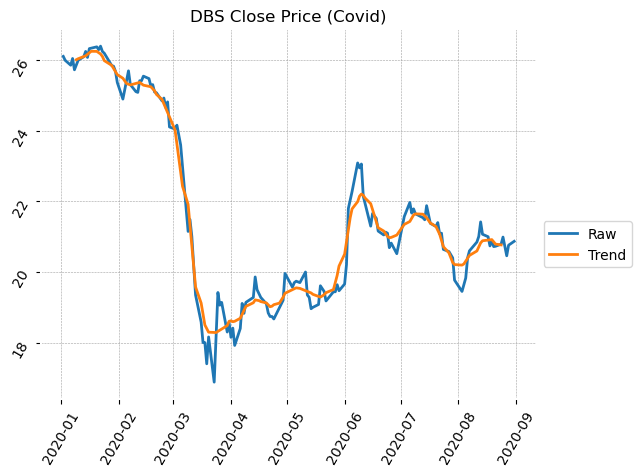

In [41]:
# for DBS
# Better view (instead of subplot)
plt.plot(df_dbs.index.values, dbs_close)
plt.plot(df_dbs.index.values, dbs_close_trend)
plt.title('DBS Close Price (Covid)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

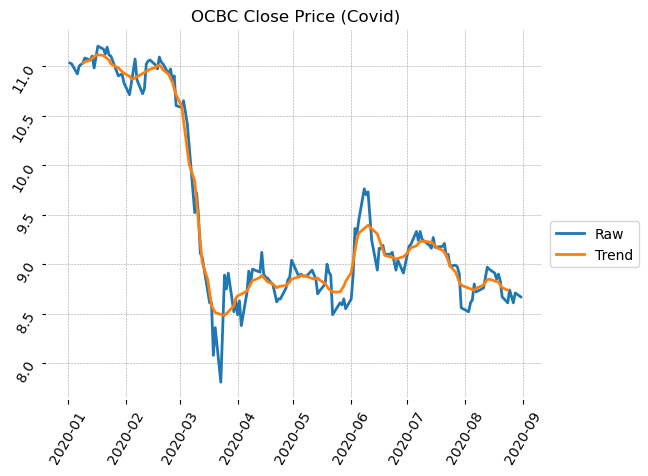

In [42]:
# for OCBC
# Better view (instead of subplot)
plt.plot(df_ocbc.index.values, ocbc_close)
plt.plot(df_ocbc.index.values, ocbc_close_trend)
plt.title('OCBC Close Price (Covid)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

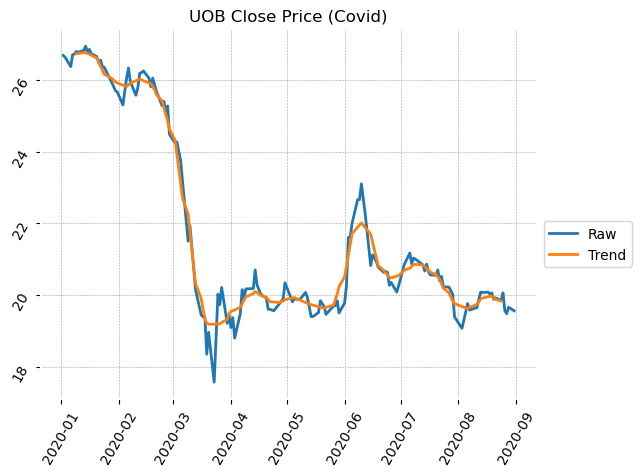

In [43]:
# for UOB
# Better view (instead of subplot)
plt.plot(df_uob.index.values, uob_close)
plt.plot(df_uob.index.values, uob_close_trend)
plt.title('UOB Close Price (Covid)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

## Visualisation of data - Individual (Covid)

- Moving Average
- Candlestick

In [44]:
# moving average (MA)
window = [5, 20, 60] #per wk/mth/qrt (weekdays only)

dbs_close_new = pd.DataFrame(df_dbs.Close)
ocbc_close_new = pd.DataFrame(df_ocbc.Close)
uob_close_new = pd.DataFrame(df_uob.Close)

for ma in window:
    col = f'MA_{ma}'
    dbs_close_new[col] = df_dbs.Close.rolling(ma).mean()
    ocbc_close_new[col] = df_ocbc.Close.rolling(ma).mean()
    uob_close_new[col] = df_uob.Close.rolling(ma).mean()

In [45]:
# Mean contains NAN
print(dbs_close_new['MA_5'].head(10))
print(dbs_close_new['MA_5'].ffill().bfill().head(10))

Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06       NaN
2020-01-07       NaN
2020-01-08    25.950
2020-01-09    25.900
2020-01-10    25.900
2020-01-13    25.948
2020-01-14    25.988
2020-01-15    26.058
Name: MA_5, dtype: float64
Date
2020-01-02    25.950
2020-01-03    25.950
2020-01-06    25.950
2020-01-07    25.950
2020-01-08    25.950
2020-01-09    25.900
2020-01-10    25.900
2020-01-13    25.948
2020-01-14    25.988
2020-01-15    26.058
Name: MA_5, dtype: float64


In [46]:
# Remove NAN
dbs_close_newer = pd.DataFrame(df_dbs.Close)
ocbc_close_newer = pd.DataFrame(df_ocbc.Close)
uob_close_newer = pd.DataFrame(df_uob.Close)

for ma in window:
    col = f'MA_{ma}'
    dbs_close_newer[col] = df_dbs.Close.rolling(ma).mean().ffill().bfill()
    ocbc_close_newer[col] = df_ocbc.Close.rolling(ma).mean().ffill().bfill()
    uob_close_newer[col] = df_uob.Close.rolling(ma).mean().ffill().bfill()

Text(0.5, 1.0, 'DBS Stock Price (Close): Raw vs MA (with NAN) - Covid')

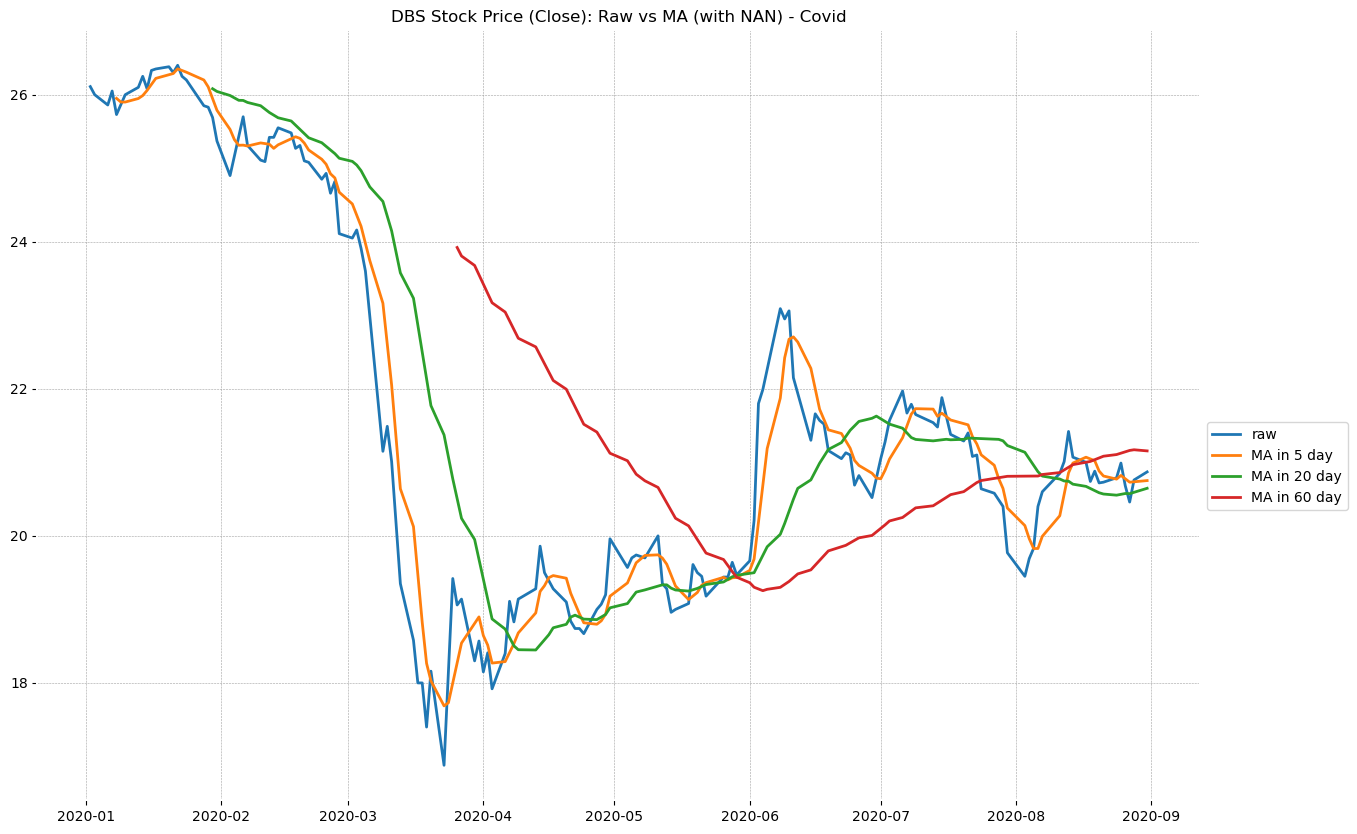

In [59]:
# plot of dbs (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(dbs_close_new['Close'], label = 'raw')
plt.plot(dbs_close_new['MA_5'], label = 'MA in 5 day')
plt.plot(dbs_close_new['MA_20'], label = 'MA in 20 day')
plt.plot(dbs_close_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('DBS Stock Price (Close): Raw vs MA (with NAN) - Covid')

Text(0.5, 1.0, 'DBS Stock Price (Close): Raw vs MA (remove NAN) - Covid')

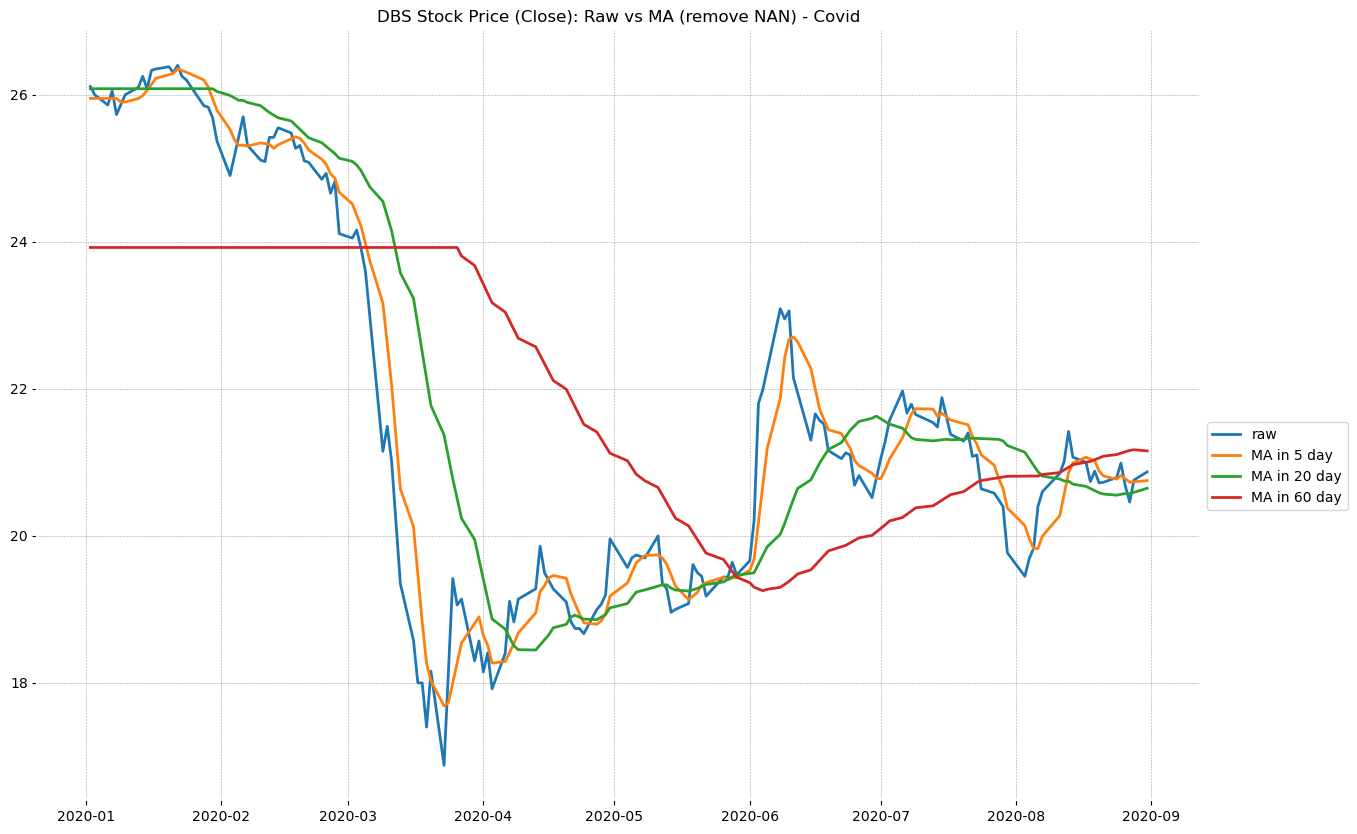

In [58]:
# plot of dbs (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(dbs_close_newer['Close'], label = 'raw')
plt.plot(dbs_close_newer['MA_5'], label = 'MA in 5 day')
plt.plot(dbs_close_newer['MA_20'], label = 'MA in 20 day')
plt.plot(dbs_close_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('DBS Stock Price (Close): Raw vs MA (remove NAN) - Covid')

Text(0.5, 1.0, 'OCBC Stock Price (Close): Raw vs MA (with NAN) - Covid')

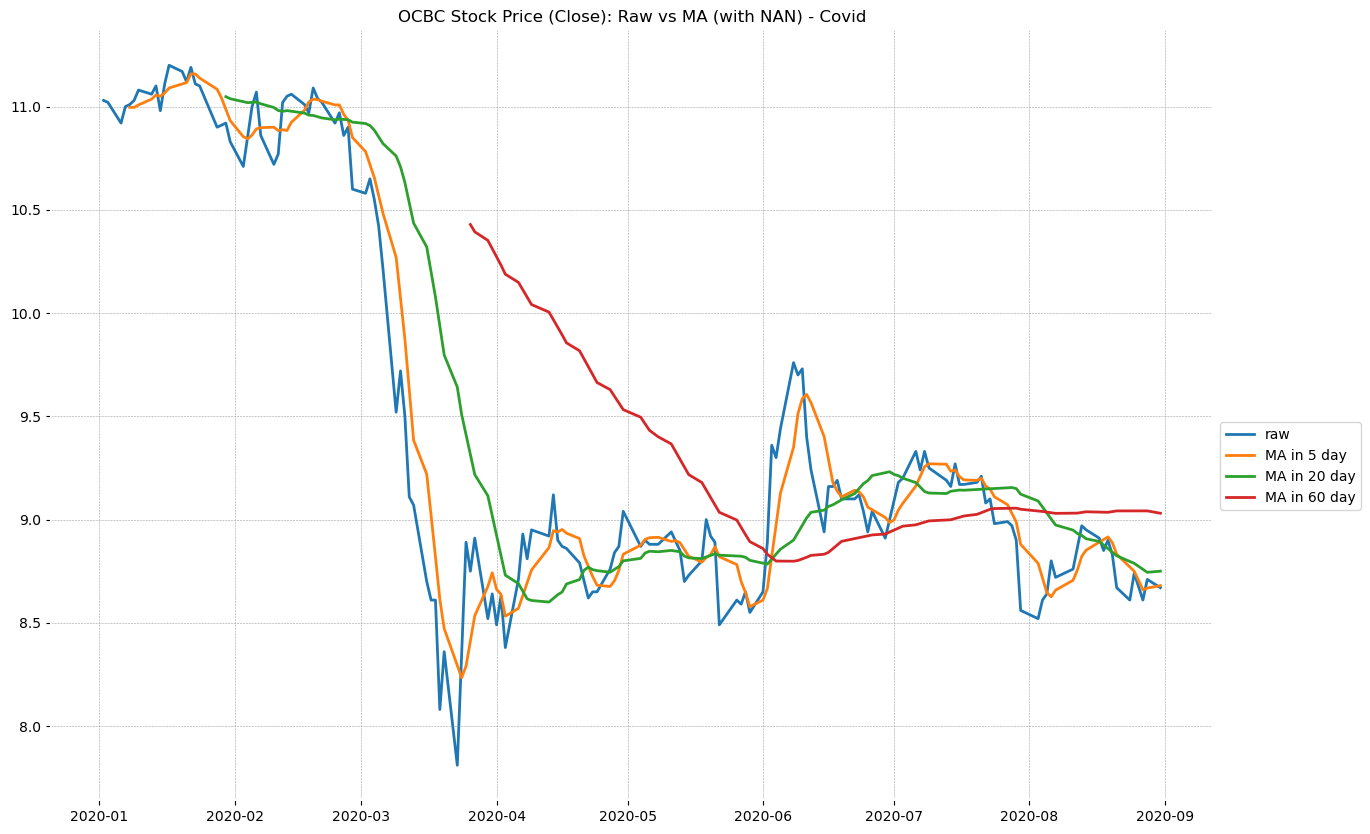

In [57]:
# plot of ocbc (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(ocbc_close_new['Close'], label = 'raw')
plt.plot(ocbc_close_new['MA_5'], label = 'MA in 5 day')
plt.plot(ocbc_close_new['MA_20'], label = 'MA in 20 day')
plt.plot(ocbc_close_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('OCBC Stock Price (Close): Raw vs MA (with NAN) - Covid')

Text(0.5, 1.0, 'OCBC Stock Price (Close): Raw vs MA (remove NAN) - Covid')

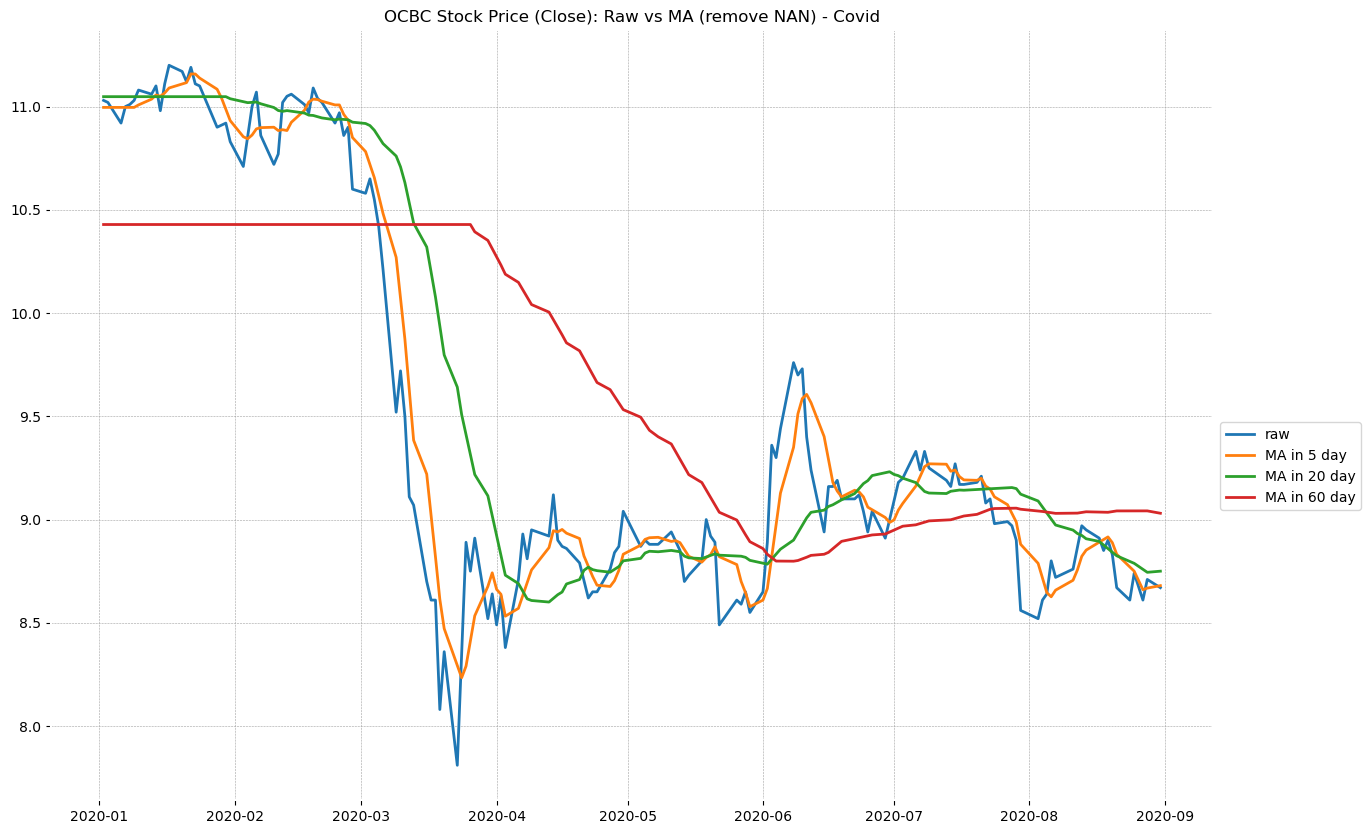

In [56]:
# plot of ocbc (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(ocbc_close_newer['Close'], label = 'raw')
plt.plot(ocbc_close_newer['MA_5'], label = 'MA in 5 day')
plt.plot(ocbc_close_newer['MA_20'], label = 'MA in 20 day')
plt.plot(ocbc_close_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('OCBC Stock Price (Close): Raw vs MA (remove NAN) - Covid')

Text(0.5, 1.0, 'UOB Stock Price (Close): Raw vs MA (with NAN) - Covid')

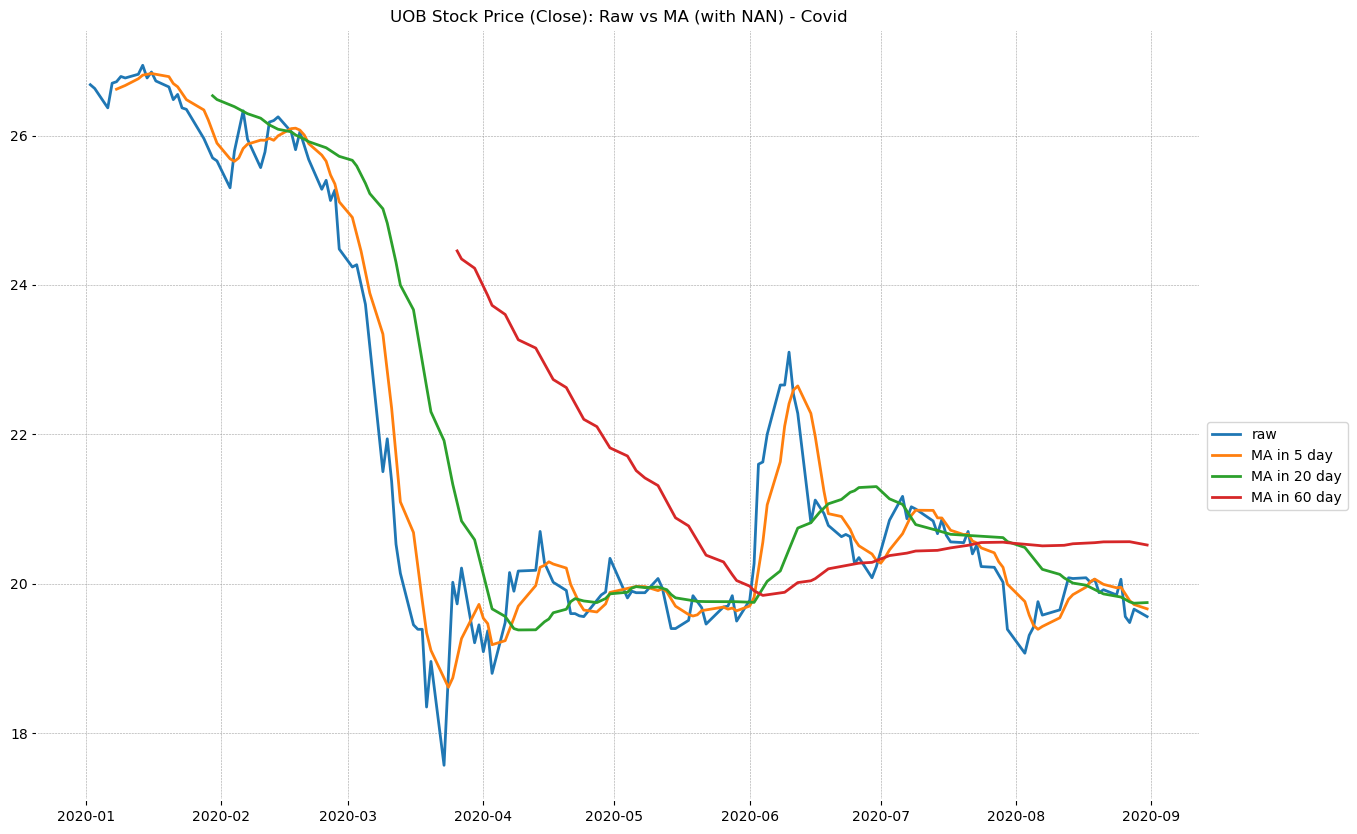

In [55]:
# plot of uob (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(uob_close_new['Close'], label = 'raw')
plt.plot(uob_close_new['MA_5'], label = 'MA in 5 day')
plt.plot(uob_close_new['MA_20'], label = 'MA in 20 day')
plt.plot(uob_close_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('UOB Stock Price (Close): Raw vs MA (with NAN) - Covid')

Text(0.5, 1.0, 'UOB Stock Price (Close): Raw vs MA (remove NAN) - Covid')

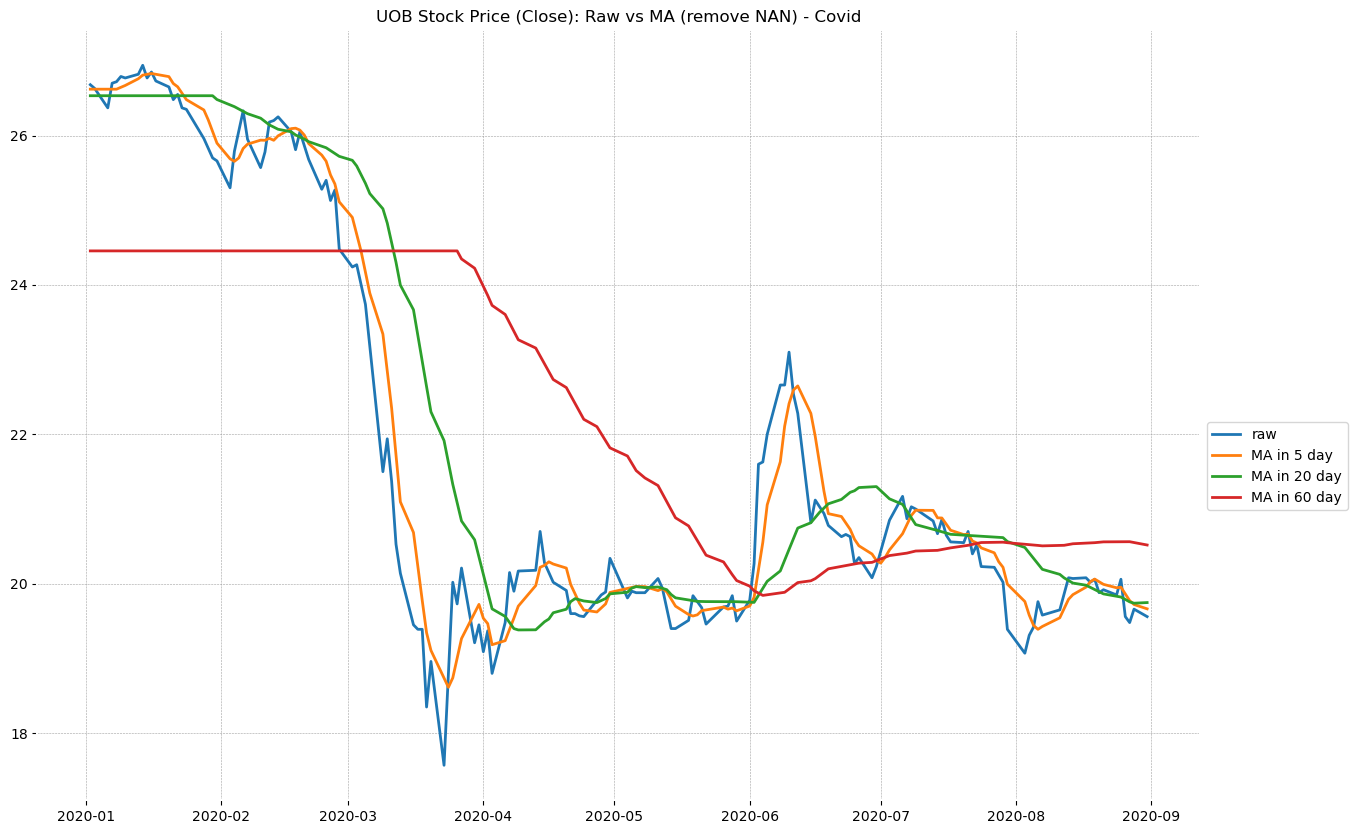

In [54]:
# plot of uob (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(uob_close_newer['Close'], label = 'raw')
plt.plot(uob_close_newer['MA_5'], label = 'MA in 5 day')
plt.plot(uob_close_newer['MA_20'], label = 'MA in 20 day')
plt.plot(uob_close_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('UOB Stock Price (Close): Raw vs MA (remove NAN) - Covid')

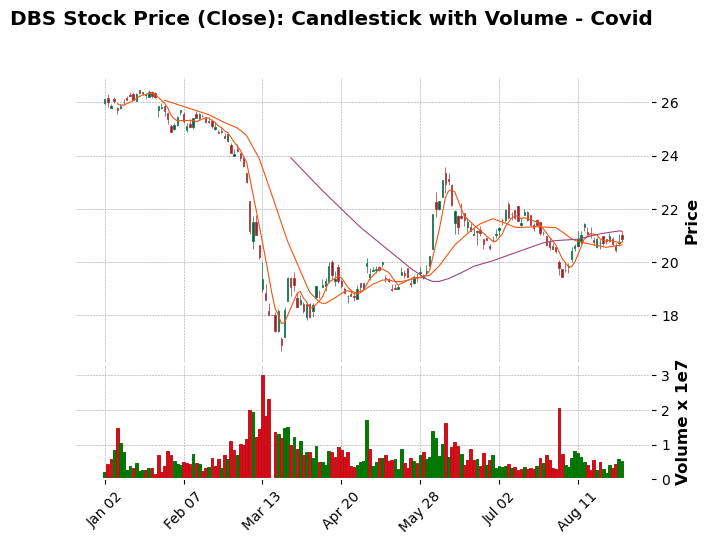

In [80]:
# Candlestick
# for DBS
# mav - moving average, use the same as above for comparison
mpf.plot(df_dbs, type='candle', style = 'charles', title='DBS Stock Price (Close): Candlestick with Volume - Covid', mav=(5,20,60), volume=True)


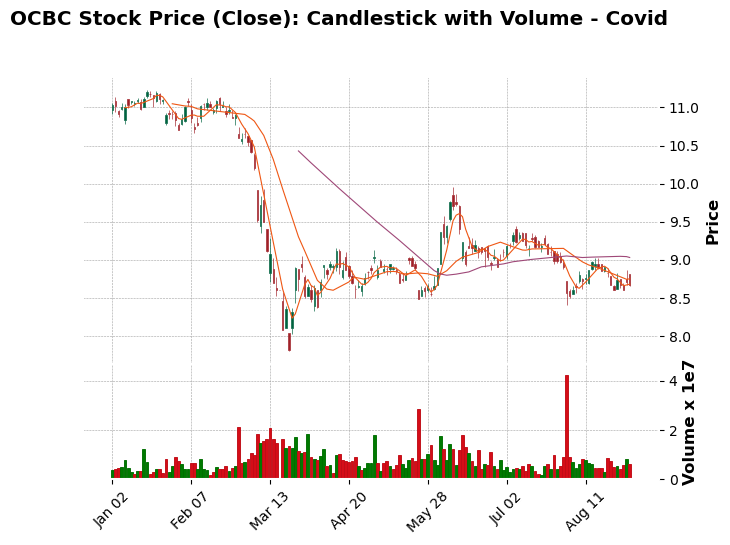

In [81]:
# for OCBC
# mav - moving average, use the same as above for comparison
mpf.plot(df_ocbc, type='candle', style = 'charles', title='OCBC Stock Price (Close): Candlestick with Volume - Covid', mav=(5,20,60), volume=True)

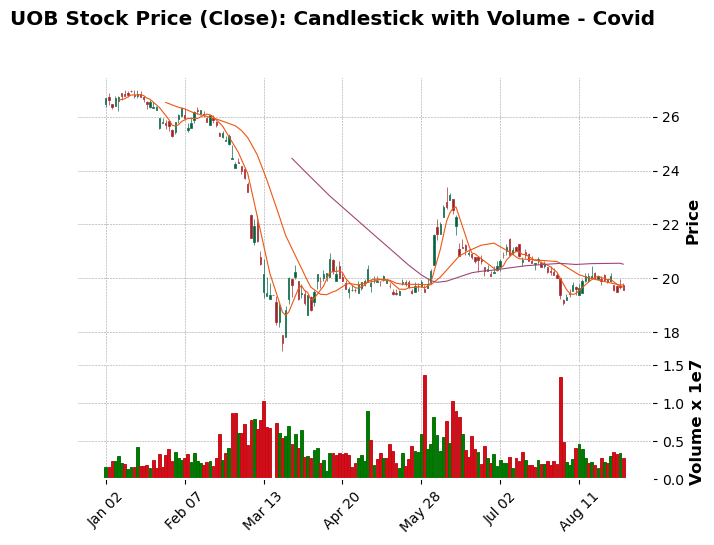

In [82]:
# for UOB
# mav - moving average, use the same as above for comparison
mpf.plot(df_uob, type='candle', style = 'charles', title='UOB Stock Price (Close): Candlestick with Volume - Covid', mav=(5,20,60), volume=True)

## Visualisation of data - group together (Covid)
Plot stock prices against time graph. 
Observe the trend and understand the impact of certain event on the stock market.

- percentage change
- standard deviation

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (15, 8)})

Text(0.5, 1.0, 'Stock prices during Covid-19 period')

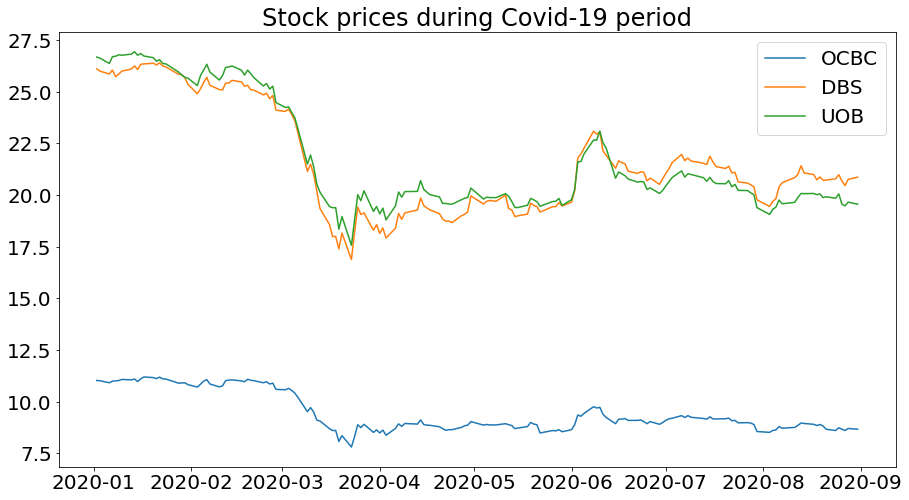

In [15]:
y1=df_ocbc['Close']
y2=df_dbs['Close']
y3=df_uob['Close']

plt.plot(df_ocbc.index.values, y1, label="OCBC");
plt.plot(df_dbs.index.values, y2, label="DBS");
plt.plot(df_uob.index.values, y3, label="UOB");
plt.legend()
plt.title('Stock prices during Covid-19 period')


## Summary statistics (Covid)
'std' for standrad deviation
Coefficient of variation(CV) = Standard deviation/mean can be used to compare variability

In [12]:
print(df_ocbc['Close'].describe(),'\n')
print(df_dbs['Close'].describe(),'\n')
print(df_uob['Close'].describe())

count    165.000000
mean       9.473697
std        0.952384
min        7.810000
25%        8.800000
50%        9.040000
75%       10.600000
max       11.200000
Name: Close, dtype: float64 

count    165.000000
mean      21.642606
std        2.612137
min       16.879999
25%       19.469999
50%       21.010000
75%       24.110001
max       26.400000
Name: Close, dtype: float64 

count    165.000000
mean      21.759333
std        2.709196
min       17.570000
25%       19.809999
50%       20.400000
75%       24.270000
max       26.940001
Name: Close, dtype: float64


## Analysis of riskiness of a single stock (Covid)

In [32]:
stocks=['O39.SI','D05.SI','U11.SI']
df=pd.DataFrame()
for stock in stocks:
    df[stock]=yf.download(stock,
                    start = '2020-01-01',
                    end = '2020-09-01',
                    progress = False)['Adj Close']
    
df.head()
#ocbc_close=df_ocbc_fc['Adj Close']
#ocbc_close.head()

,O39.SI,D05.SI,U11.SI
Date,,,
2020-01-02,10.490239,25.006714,25.665627
2020-01-03,10.480728,24.901360,25.617527
2020-01-06,10.385622,24.767277,25.367414
2020-01-07,10.461707,24.949247,25.684868
2020-01-08,10.471218,24.642769,25.704103


In [22]:
stock_returns_daily=df.pct_change()
stock_returns_daily.head()

,O39.SI,D05.SI,U11.SI
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.000907,-0.004213,-0.001874
2020-01-06,-0.009074,-0.005385,-0.009763
2020-01-07,0.007326,0.007347,0.012514
2020-01-08,0.000909,-0.012284,0.000749


In [23]:
stock_volatility_daily=stock_returns_daily.std()
stock_volatility_daily

O39.SI    0.018509
D05.SI    0.020647
U11.SI    0.019259
dtype: float64

In [24]:
print(str(round(stock_volatility_daily, 5) * 100) + '%')

O39.SI    1.851
D05.SI    2.065
U11.SI    1.926
dtype: float64%


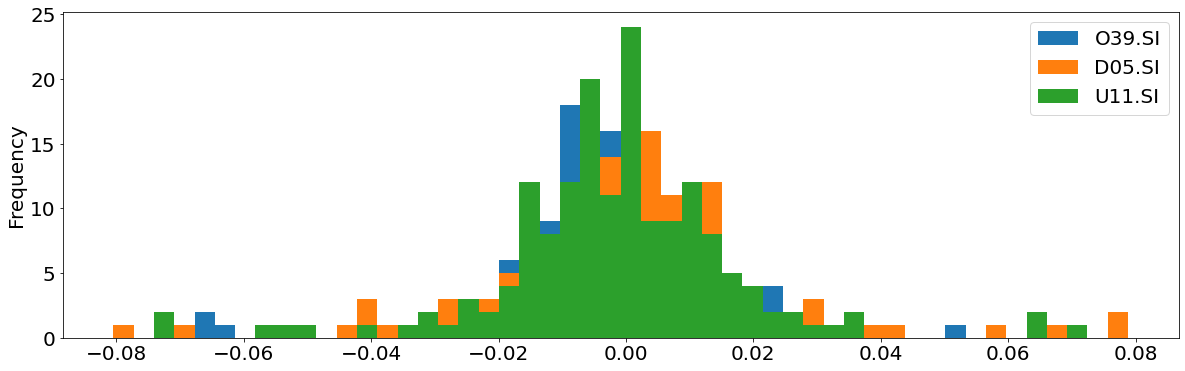

In [25]:
stock_returns_daily.plot.hist(bins=50, figsize=(20,6))

## Case Study 2: Impact of 2007-2008 financial crisis on stocks offered by local banks

In [63]:
df_ocbc_fc = yf.download(ticker_list[1],
                    start = START_DATE_2,
                    end = END_DATE_2,
                    progress = False)
df_dbs_fc = yf.download(ticker_list[0],
                    start = START_DATE_2,
                    end = END_DATE_2,
                    progress = False)
df_uob_fc = yf.download(ticker_list[2],
                    start = START_DATE_2,
                    end = END_DATE_2,
                    progress = False)

In [64]:
df_ocbc_fc.info();
df_dbs_fc.info();
df_uob_fc.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 2007-12-03 to 2009-06-30
Data columns (total 6 columns):
Open         396 non-null float64
High         396 non-null float64
Low          396 non-null float64
Close        396 non-null float64
Adj Close    396 non-null float64
Volume       396 non-null int64
dtypes: float64(5), int64(1)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 2007-12-03 to 2009-06-30
Data columns (total 6 columns):
Open         396 non-null float64
High         396 non-null float64
Low          396 non-null float64
Close        396 non-null float64
Adj Close    396 non-null float64
Volume       396 non-null int64
dtypes: float64(5), int64(1)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 2007-12-03 to 2009-06-30
Data columns (total 6 columns):
Open         396 non-null float64
High         396 non-null float64
Low          396 non-null float64
Close        396 non-nu

# Smooth the raw data to get trend
- decomposition

In [66]:
# Smooth technique: decomposition

# demonstrate using column 'Close' first

dbs_close_fc = df_dbs_fc.Close[:]
ocbc_close_fc = df_ocbc_fc.Close[:]
uob_close_fc = df_uob_fc.Close[:]


from statsmodels.tsa.seasonal import seasonal_decompose
dbs_close_fc_decomp = seasonal_decompose(dbs_close_fc.values, period=10)
ocbc_close_fc_decomp = seasonal_decompose(ocbc_close_fc.values, period=10)
uob_close_fc_decomp = seasonal_decompose(uob_close_fc.values, period=10)

# After decomposition, only interested in "trend"
dbs_close_fc_trend = dbs_close_fc_decomp.trend
ocbc_close_fc_trend = ocbc_close_fc_decomp.trend
uob_close_fc_trend = uob_close_fc_decomp.trend

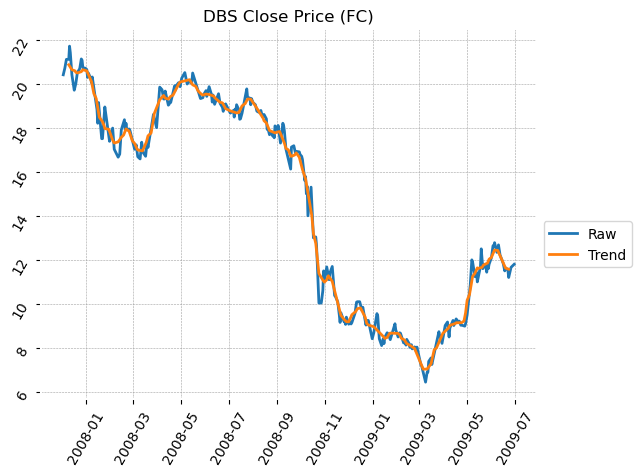

In [68]:
# for DBS
# Better view (instead of subplot)
plt.plot(df_dbs_fc.index.values, dbs_close_fc)
plt.plot(df_dbs_fc.index.values, dbs_close_fc_trend)
plt.title('DBS Close Price (FC)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

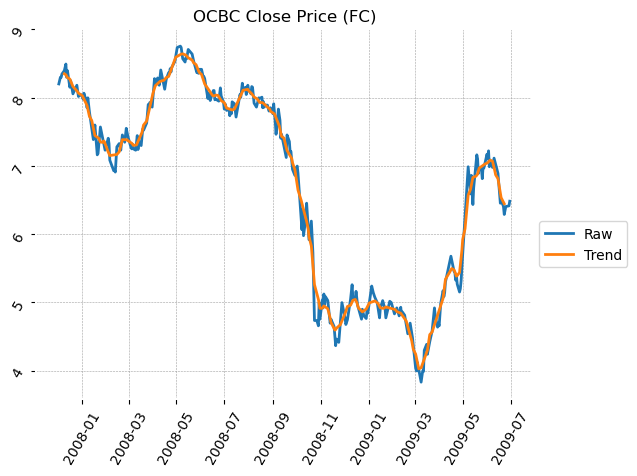

In [69]:
# for OCBC
# Better view (instead of subplot)
plt.plot(df_ocbc_fc.index.values, ocbc_close_fc)
plt.plot(df_ocbc_fc.index.values, ocbc_close_fc_trend)
plt.title('OCBC Close Price (FC)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

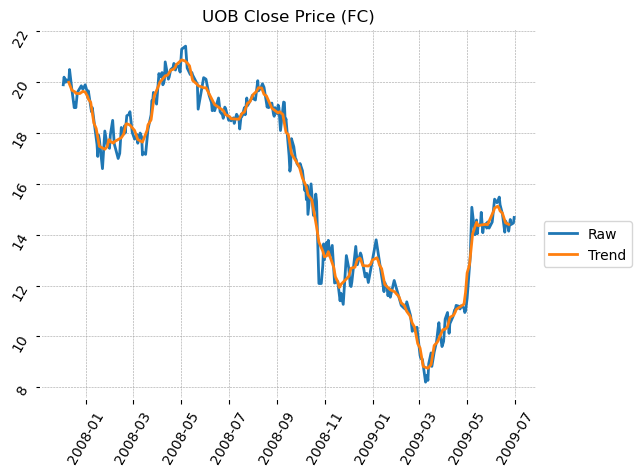

In [70]:
# for UOB
# Better view (instead of subplot)
plt.plot(df_uob_fc.index.values, uob_close_fc)
plt.plot(df_uob_fc.index.values, uob_close_fc_trend)
plt.title('UOB Close Price (FC)')
plt.legend(['Raw','Trend'], loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(labelrotation=60)

# Visualization of data individually 
- Moving Average
- Candlestick 

In [71]:
# moving average (MA)
window = [5, 20, 60] #per wk/mth/qrt (weekdays only)

dbs_close_fc_new = pd.DataFrame(df_dbs_fc.Close)
ocbc_close_fc_new = pd.DataFrame(df_ocbc_fc.Close)
uob_close_fc_new = pd.DataFrame(df_uob_fc.Close)

for ma in window:
    col = f'MA_{ma}'
    dbs_close_fc_new[col] = df_dbs_fc.Close.rolling(ma).mean()
    ocbc_close_fc_new[col] = df_ocbc_fc.Close.rolling(ma).mean()
    uob_close_fc_new[col] = df_uob_fc.Close.rolling(ma).mean()
    

# Mean contains NAN
print(dbs_close_fc_new['MA_5'].head(10))
print(dbs_close_fc_new['MA_5'].ffill().bfill().head(10))

Date
2007-12-03      NaN
2007-12-04      NaN
2007-12-05      NaN
2007-12-06      NaN
2007-12-07    20.74
2007-12-10    20.88
2007-12-11    21.12
2007-12-12    21.26
2007-12-13    21.18
2007-12-14    21.04
Name: MA_5, dtype: float64
Date
2007-12-03    20.74
2007-12-04    20.74
2007-12-05    20.74
2007-12-06    20.74
2007-12-07    20.74
2007-12-10    20.88
2007-12-11    21.12
2007-12-12    21.26
2007-12-13    21.18
2007-12-14    21.04
Name: MA_5, dtype: float64


In [72]:
# Remove NAN
dbs_close_fc_newer = pd.DataFrame(df_dbs_fc.Close)
ocbc_close_fc_newer = pd.DataFrame(df_ocbc_fc.Close)
uob_close_fc_newer = pd.DataFrame(df_uob_fc.Close)

for ma in window:
    col = f'MA_{ma}'
    dbs_close_fc_newer[col] = df_dbs_fc.Close.rolling(ma).mean().ffill().bfill()
    ocbc_close_fc_newer[col] = df_ocbc_fc.Close.rolling(ma).mean().ffill().bfill()
    uob_close_fc_newer[col] = df_uob_fc.Close.rolling(ma).mean().ffill().bfill()

Text(0.5, 1.0, 'DBS Stock Price (Close): Raw vs MA (with NAN) - FC')

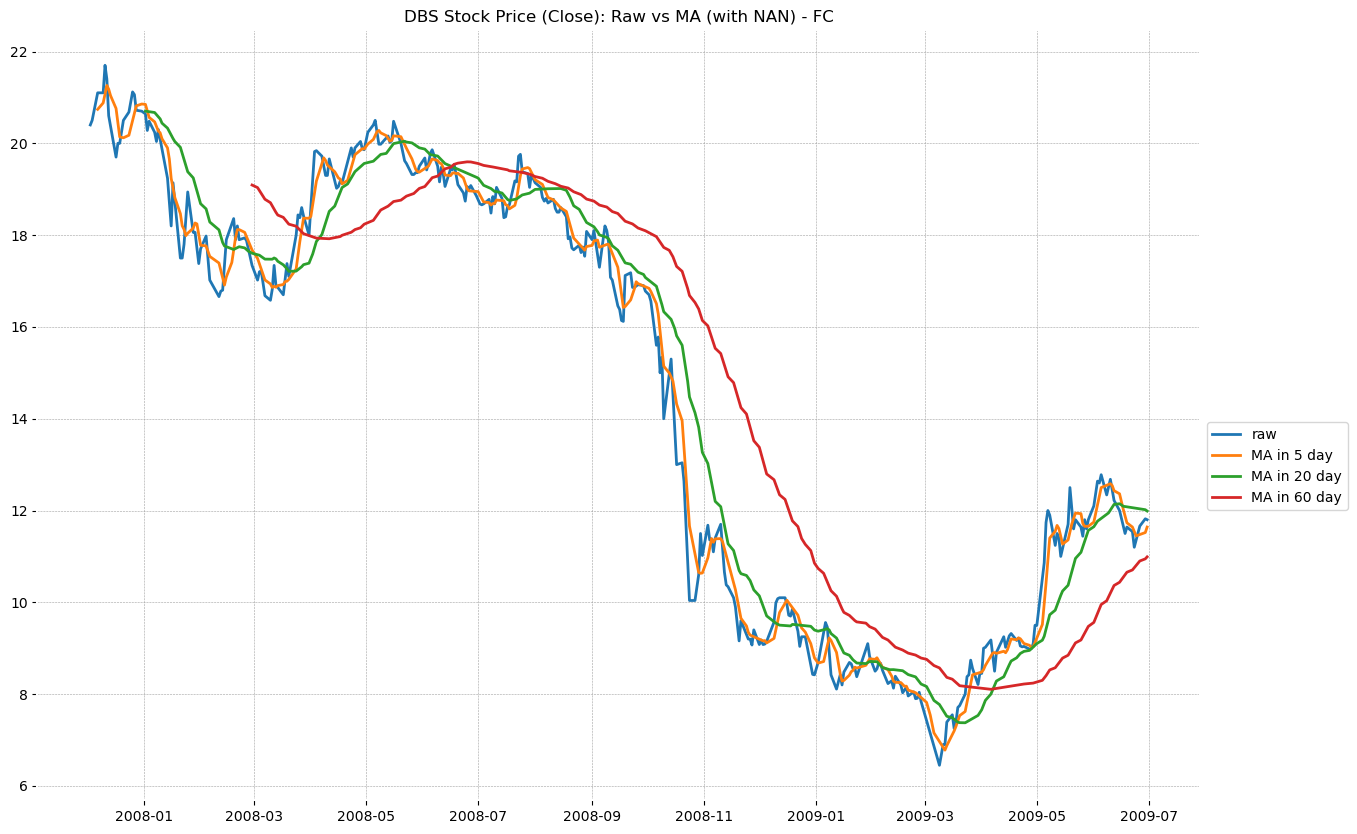

In [73]:
# plot of dbs (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(dbs_close_fc_new['Close'], label = 'raw')
plt.plot(dbs_close_fc_new['MA_5'], label = 'MA in 5 day')
plt.plot(dbs_close_fc_new['MA_20'], label = 'MA in 20 day')
plt.plot(dbs_close_fc_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('DBS Stock Price (Close): Raw vs MA (with NAN) - FC')

Text(0.5, 1.0, 'DBS Stock Price (Close): Raw vs MA (remove NAN) - FC')

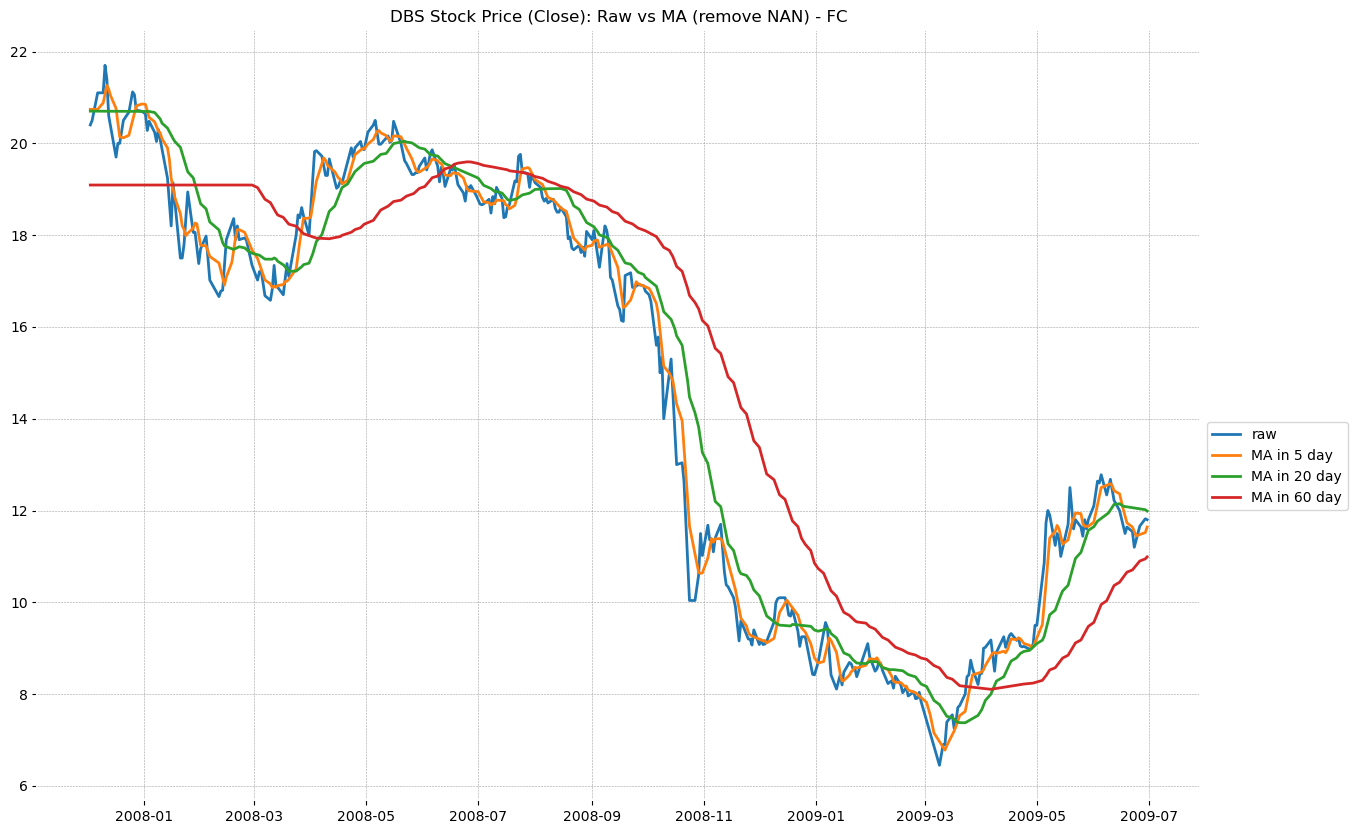

In [74]:
# plot of dbs (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(dbs_close_fc_newer['Close'], label = 'raw')
plt.plot(dbs_close_fc_newer['MA_5'], label = 'MA in 5 day')
plt.plot(dbs_close_fc_newer['MA_20'], label = 'MA in 20 day')
plt.plot(dbs_close_fc_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('DBS Stock Price (Close): Raw vs MA (remove NAN) - FC')

Text(0.5, 1.0, 'OCBC Stock Price (Close): Raw vs MA (with NAN) - FC')

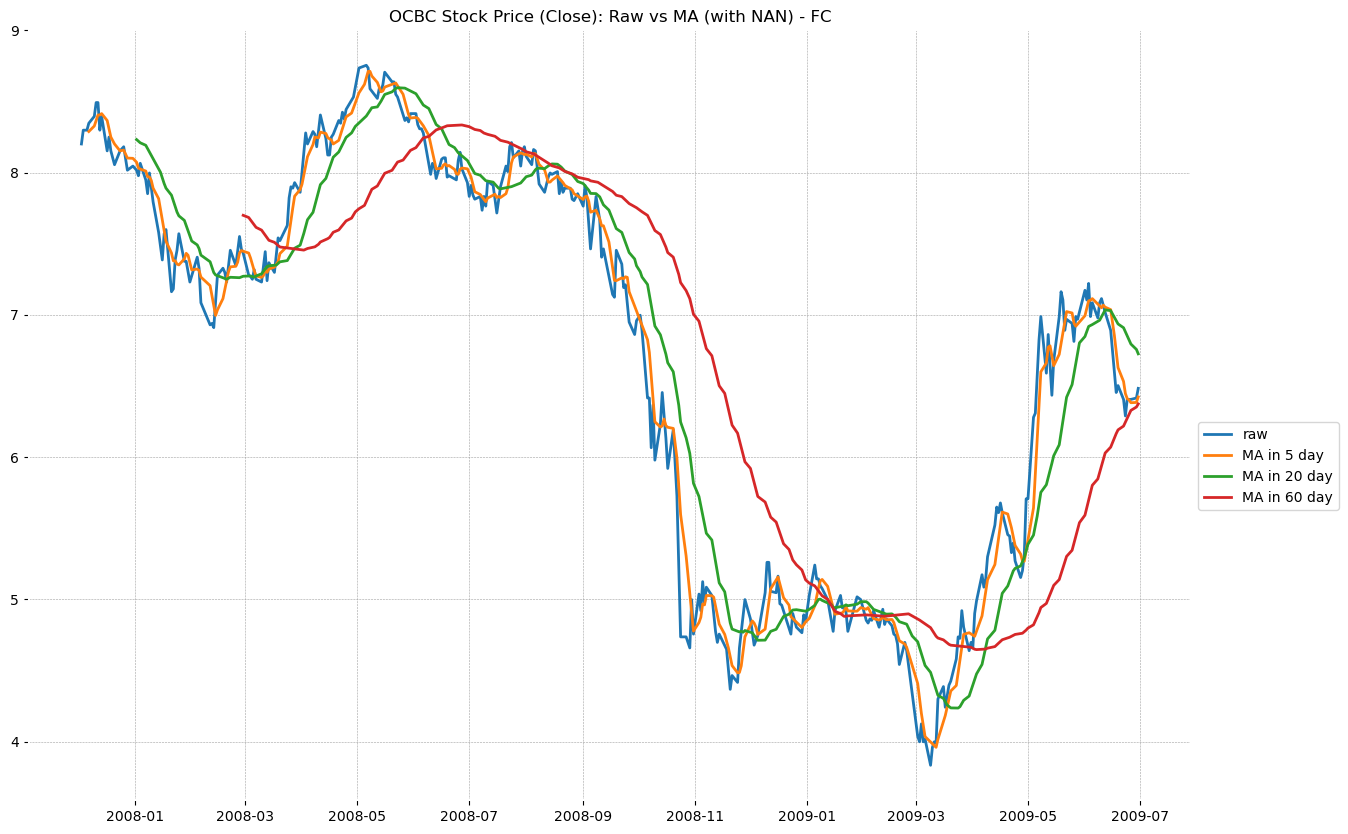

In [75]:
# plot of ocbc (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(ocbc_close_fc_new['Close'], label = 'raw')
plt.plot(ocbc_close_fc_new['MA_5'], label = 'MA in 5 day')
plt.plot(ocbc_close_fc_new['MA_20'], label = 'MA in 20 day')
plt.plot(ocbc_close_fc_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('OCBC Stock Price (Close): Raw vs MA (with NAN) - FC')

Text(0.5, 1.0, 'OCBC Stock Price (Close): Raw vs MA (remove NAN) - FC')

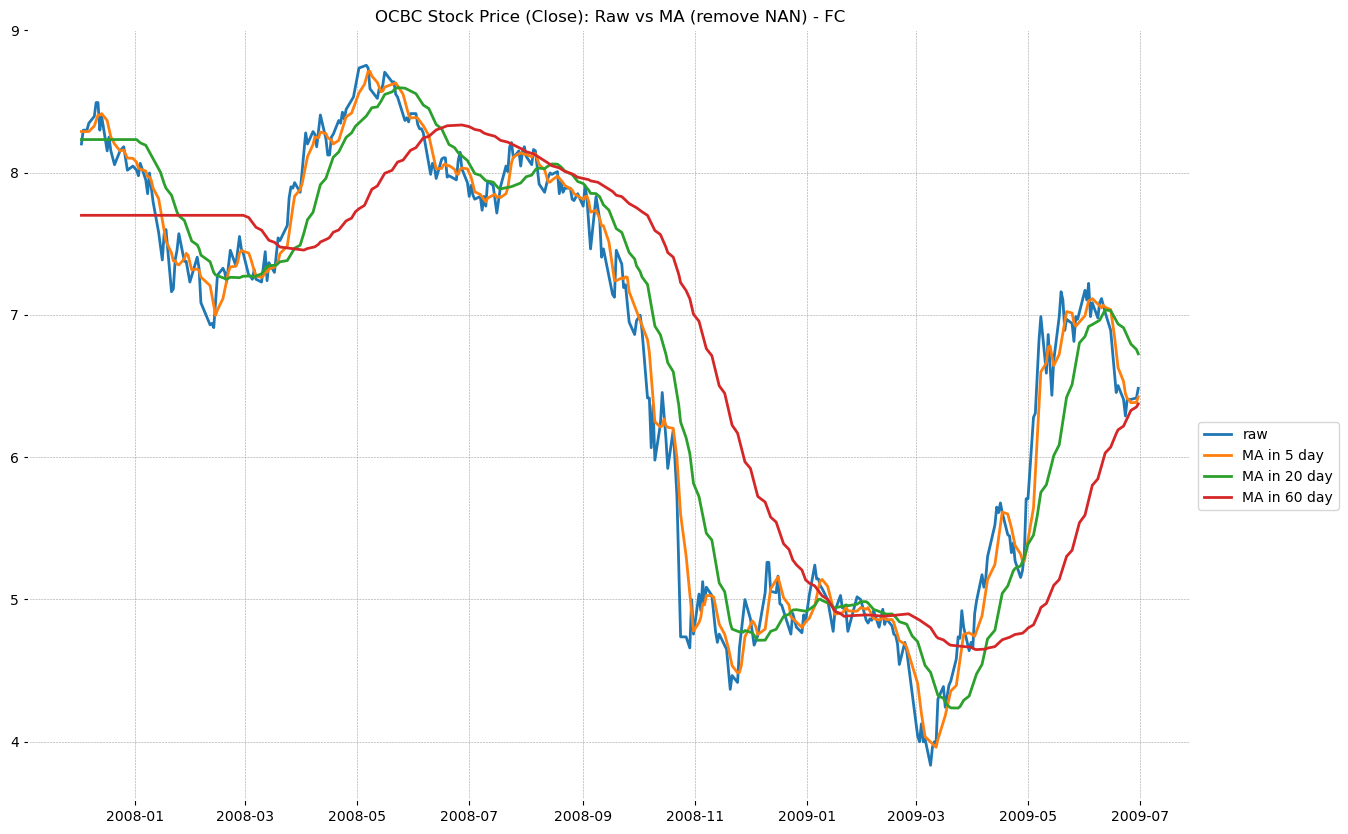

In [76]:
# plot of ocbc (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(ocbc_close_fc_newer['Close'], label = 'raw')
plt.plot(ocbc_close_fc_newer['MA_5'], label = 'MA in 5 day')
plt.plot(ocbc_close_fc_newer['MA_20'], label = 'MA in 20 day')
plt.plot(ocbc_close_fc_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('OCBC Stock Price (Close): Raw vs MA (remove NAN) - FC')

Text(0.5, 1.0, 'UOB Stock Price (Close): Raw vs MA (with NAN) - FC')

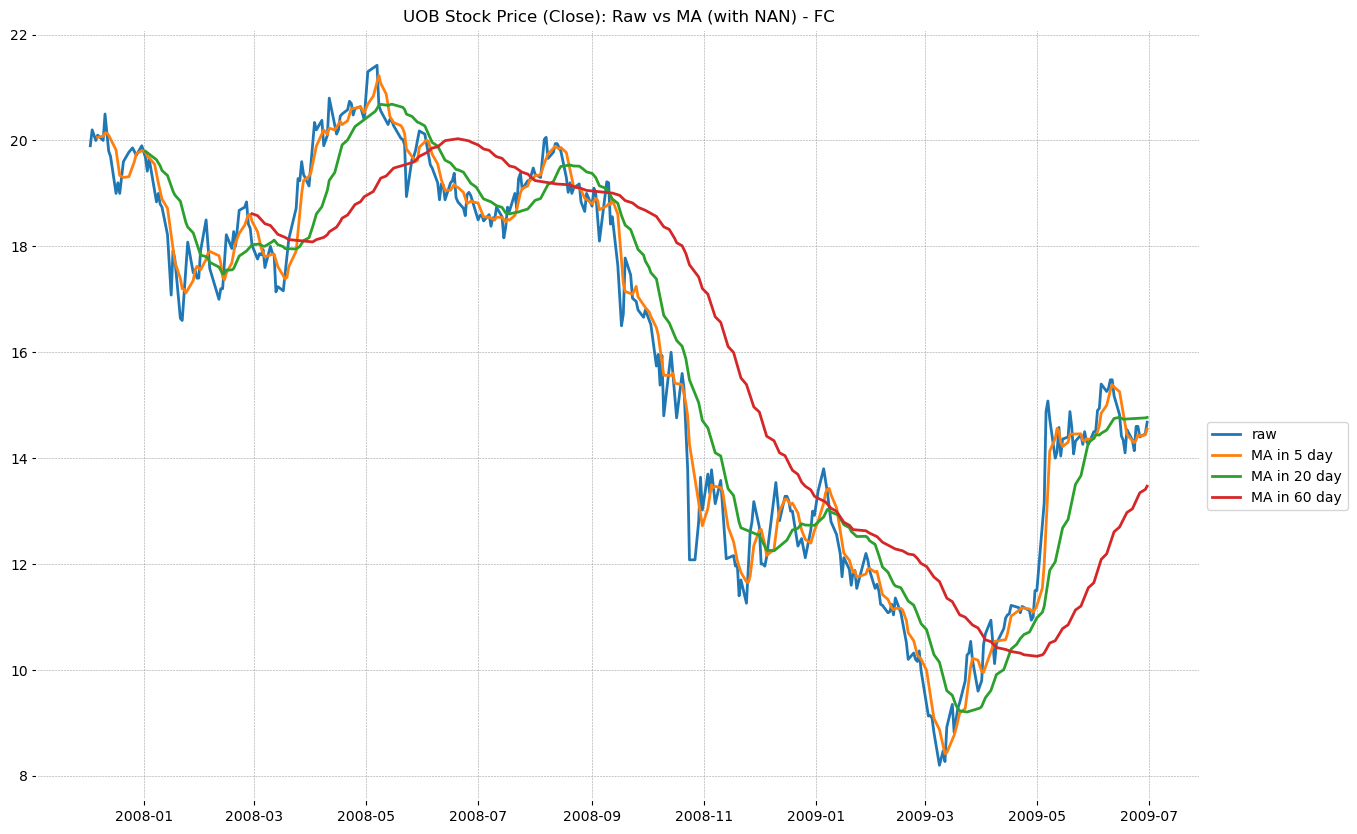

In [77]:
# plot of uob (mean with NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(uob_close_fc_new['Close'], label = 'raw')
plt.plot(uob_close_fc_new['MA_5'], label = 'MA in 5 day')
plt.plot(uob_close_fc_new['MA_20'], label = 'MA in 20 day')
plt.plot(uob_close_fc_new['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('UOB Stock Price (Close): Raw vs MA (with NAN) - FC')

Text(0.5, 1.0, 'UOB Stock Price (Close): Raw vs MA (remove NAN) - FC')

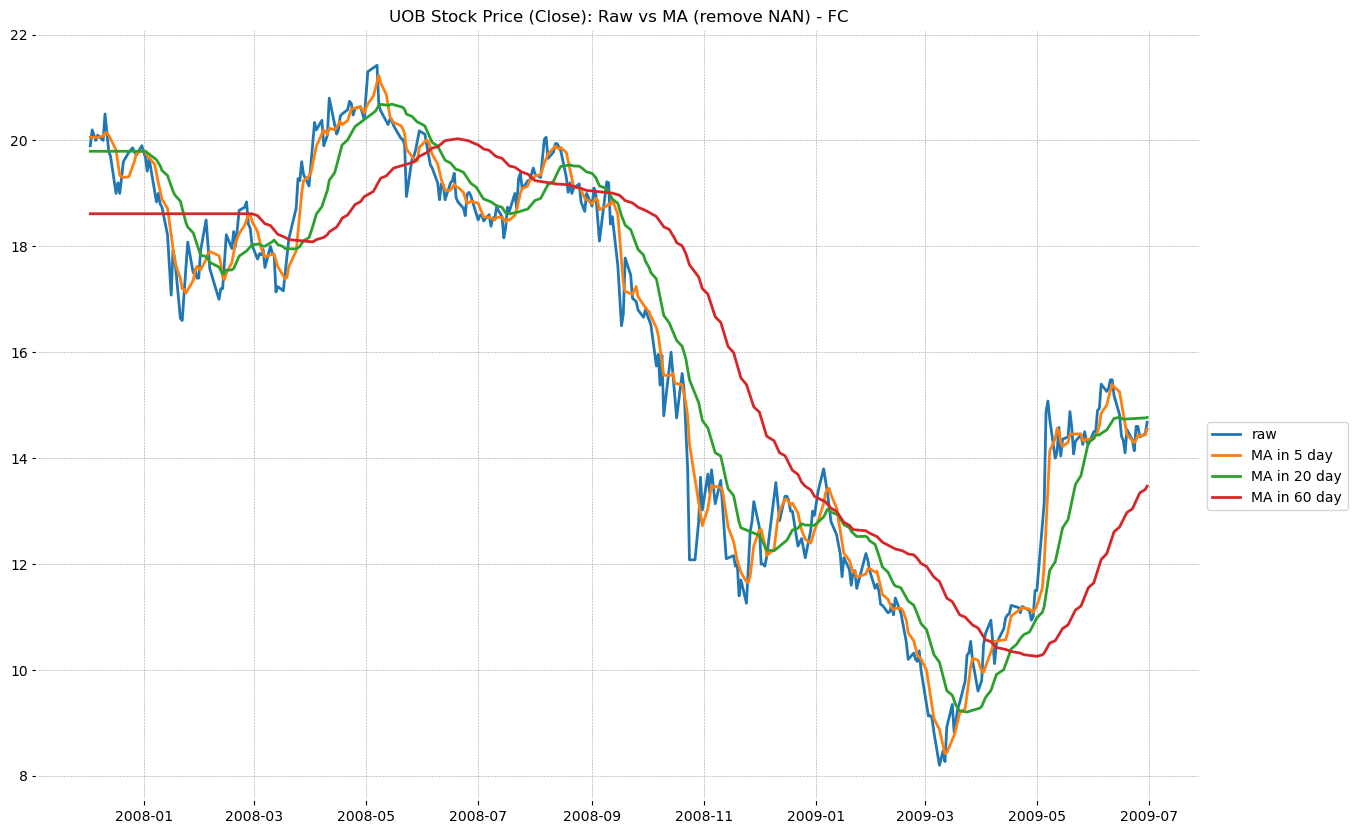

In [78]:
# plot of uob (mean remove NAN)

plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(uob_close_fc_newer['Close'], label = 'raw')
plt.plot(uob_close_fc_newer['MA_5'], label = 'MA in 5 day')
plt.plot(uob_close_fc_newer['MA_20'], label = 'MA in 20 day')
plt.plot(uob_close_fc_newer['MA_60'], label = 'MA in 60 day')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.title('UOB Stock Price (Close): Raw vs MA (remove NAN) - FC')

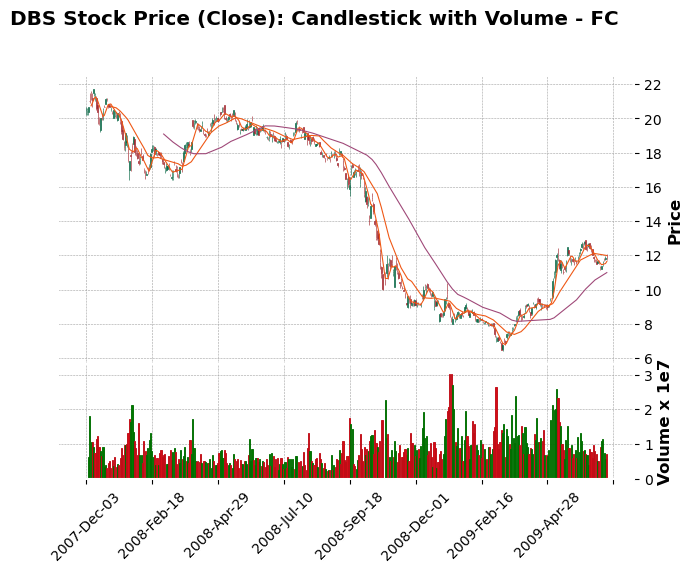

In [83]:
# Candlestick
# for DBS
# mav - moving average, use the same as above for comparison
mpf.plot(df_dbs_fc, type='candle', style = 'charles', title='DBS Stock Price (Close): Candlestick with Volume - FC', mav=(5,20,60), volume=True)


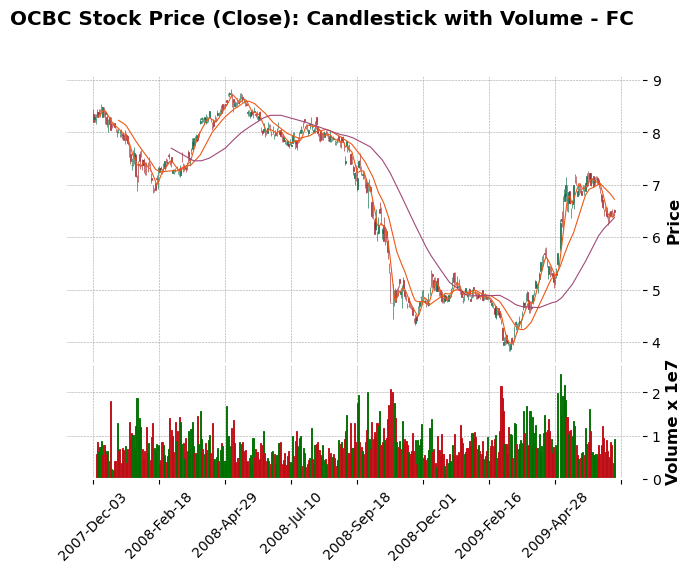

In [84]:
# Candlestick
# for OCBC
# mav - moving average, use the same as above for comparison
mpf.plot(df_ocbc_fc, type='candle', style = 'charles', title='OCBC Stock Price (Close): Candlestick with Volume - FC', mav=(5,20,60), volume=True)



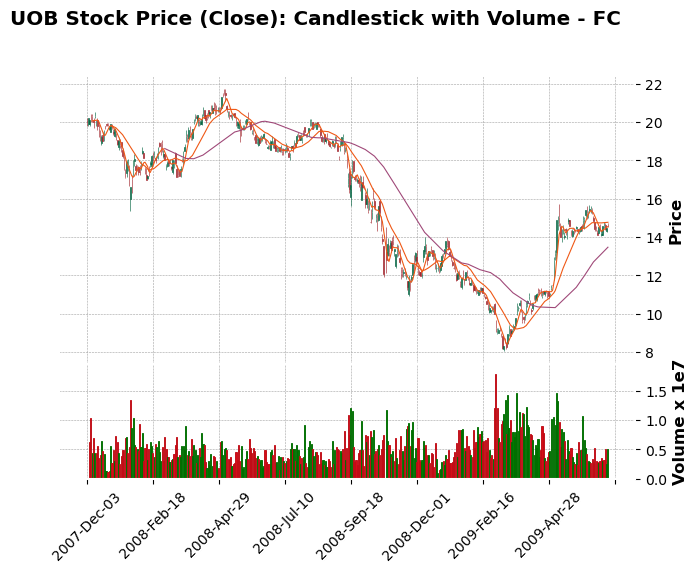

In [85]:
# Candlestick
# for UOB
# mav - moving average, use the same as above for comparison
mpf.plot(df_uob_fc, type='candle', style = 'charles', title='UOB Stock Price (Close): Candlestick with Volume - FC', mav=(5,20,60), volume=True)



## Data visualisation (financial crisis)

In [18]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 8)})

Text(0.5, 1.0, 'Stock prices during 2007-2008 Financial Crisis')

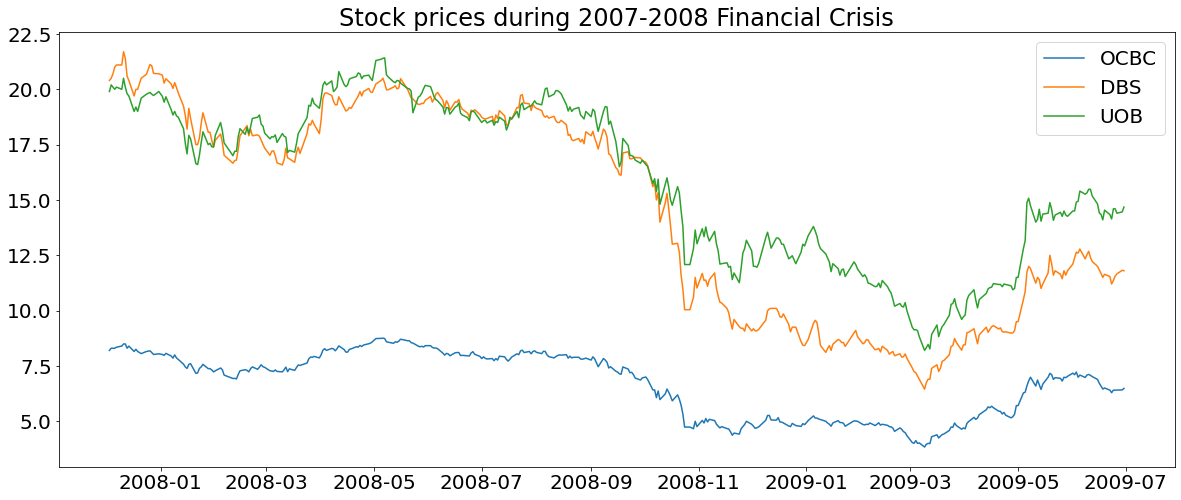

In [19]:
y1=df_ocbc_fc['Close']
y2=df_dbs_fc['Close']
y3=df_uob_fc['Close']

plt.plot(df_ocbc_fc.index.values, y1, label="OCBC");
plt.plot(df_dbs_fc.index.values, y2, label="DBS");
plt.plot(df_uob_fc.index.values, y3, label="UOB");
plt.legend()
plt.title("Stock prices during 2007-2008 Financial Crisis")

## Summary statistics (financial crisis)

In [20]:
print(df_ocbc_fc['Close'].describe(),'\n')
print(df_dbs_fc['Close'].describe(),'\n')
print(df_uob_fc['Close'].describe())

count    396.000000
mean       6.710189
std        1.431308
min        3.833640
25%        5.054093
50%        7.177150
75%        7.968140
max        8.754280
Name: Close, dtype: float64 

count    396.000000
mean      14.646490
std        4.673433
min        6.450000
25%        9.500000
50%       16.809999
75%       19.005000
max       21.700001
Name: Close, dtype: float64 

count    396.000000
mean      15.925404
std        3.602100
min        8.200000
25%       12.700000
50%       17.020000
75%       19.110000
max       21.420000
Name: Close, dtype: float64


## Analysis of riskiness of a single stock (financial crisis)

In [26]:
stocks=['O39.SI','D05.SI','U11.SI']
df=pd.DataFrame()
for stock in stocks:
    df[stock]=yf.download(stock,
                    start = '2007-12-01',
                    end = '2009-07-01',
                    progress = False)['Adj Close']
    
df.head()
#ocbc_close=df_ocbc_fc['Adj Close']
#ocbc_close.head()

,O39.SI,D05.SI,U11.SI
Date,,,
2007-12-03,4.975584,12.401211,12.912032
2007-12-04,5.034471,12.462009,13.106685
2007-12-05,5.034471,12.583585,13.041799
2007-12-06,5.034471,12.765953,12.976912
2007-12-07,5.063908,12.826744,13.041799


In [27]:
stock_returns_daily=df.pct_change()
stock_returns_daily.head()

,O39.SI,D05.SI,U11.SI
Date,,,
2007-12-03,NaN,NaN,NaN
2007-12-04,0.011835,0.004903,0.015075
2007-12-05,0.000000,0.009756,-0.004951
2007-12-06,0.000000,0.014493,-0.004975
2007-12-07,0.005847,0.004762,0.005000


In [28]:
stock_volatility_daily=stock_returns_daily.std()
stock_volatility_daily

O39.SI    0.023215
D05.SI    0.026536
U11.SI    0.027011
dtype: float64

In [29]:
print(str(round(stock_volatility_daily, 5) * 100) + '%')

O39.SI    2.322
D05.SI    2.654
U11.SI    2.701
dtype: float64%


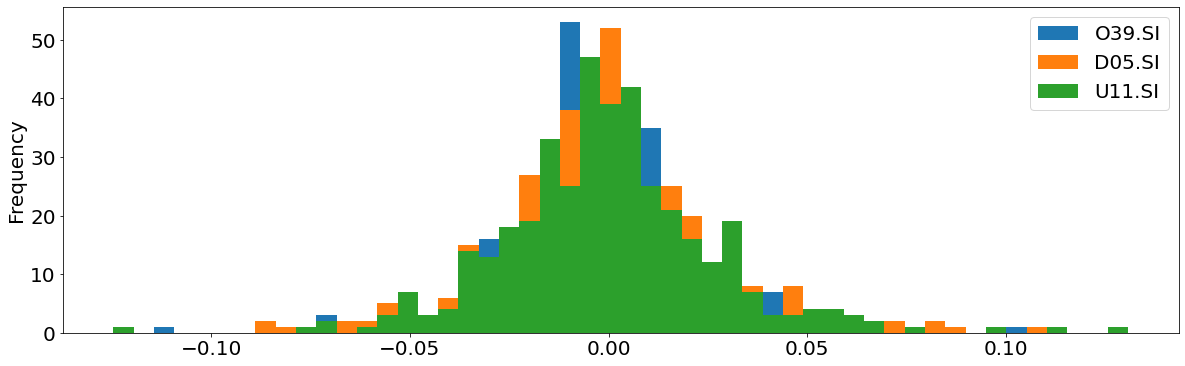

In [30]:
stock_returns_daily.plot.hist(bins=50, figsize=(20,6))